
### Weather forecasting using LSTM
In this project we are going to use weather dataset for time series forecasting and we are predicting future 30 days weather by using LSTM

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.


In [1]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('delhiWeatherHistory.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])
data

,temp
datetime_utc,
19961101-11:00,30.0
19961101-12:00,28.0
19961101-13:00,24.0
19961101-14:00,24.0
19961101-16:00,23.0
...,...
20170424-06:00,34.0
20170424-09:00,38.0
20170424-12:00,36.0


Now we are using only data for 365 days

In [4]:
df=data[:365]
df.shape

(365, 1)

In [5]:
df.isnull().sum()

temp    3
dtype: int64

In [6]:
df=df.dropna(axis=0)

In [7]:
df.shape

(362, 1)

In [8]:
df=df['temp'].values
df

array([30., 28., 24., 24., 23., 21., 21., 21., 19., 19., 19., 19., 19.,
       19., 20., 22., 23., 26., 28., 30., 31., 31., 31., 30., 27., 25.,
       22., 21., 19., 20., 19., 19., 17., 17., 17., 17., 17., 16., 17.,
       19., 22., 22., 26., 28., 28., 29., 29., 27., 26., 22., 22., 21.,
       21., 20., 20., 19., 19., 19., 17., 17., 18., 15., 17., 20., 26.,
       28., 28., 29., 29., 29., 27., 25., 23., 21., 21., 18., 18., 17.,
       24., 26., 29., 30., 30., 28., 29., 29., 29., 28., 25., 24., 20.,
       19., 19., 19., 18., 17., 16., 16., 15., 15., 17., 18., 19., 23.,
       25., 27., 29., 29., 30., 30., 29., 25., 24., 22., 20., 19., 19.,
       19., 18., 17., 17., 16., 15., 15., 16., 18., 21., 24., 27., 28.,
       29., 29., 28., 27., 23., 21., 21., 20., 20., 19., 19., 18., 17.,
       17., 16., 16., 16., 15., 16., 18., 21., 24., 27., 28., 28., 27.,
       25., 21., 20., 19., 19., 18., 17., 17., 17., 15., 15., 15., 14.,
       14., 15., 18., 22., 24., 26., 28., 29., 29., 29., 27., 23

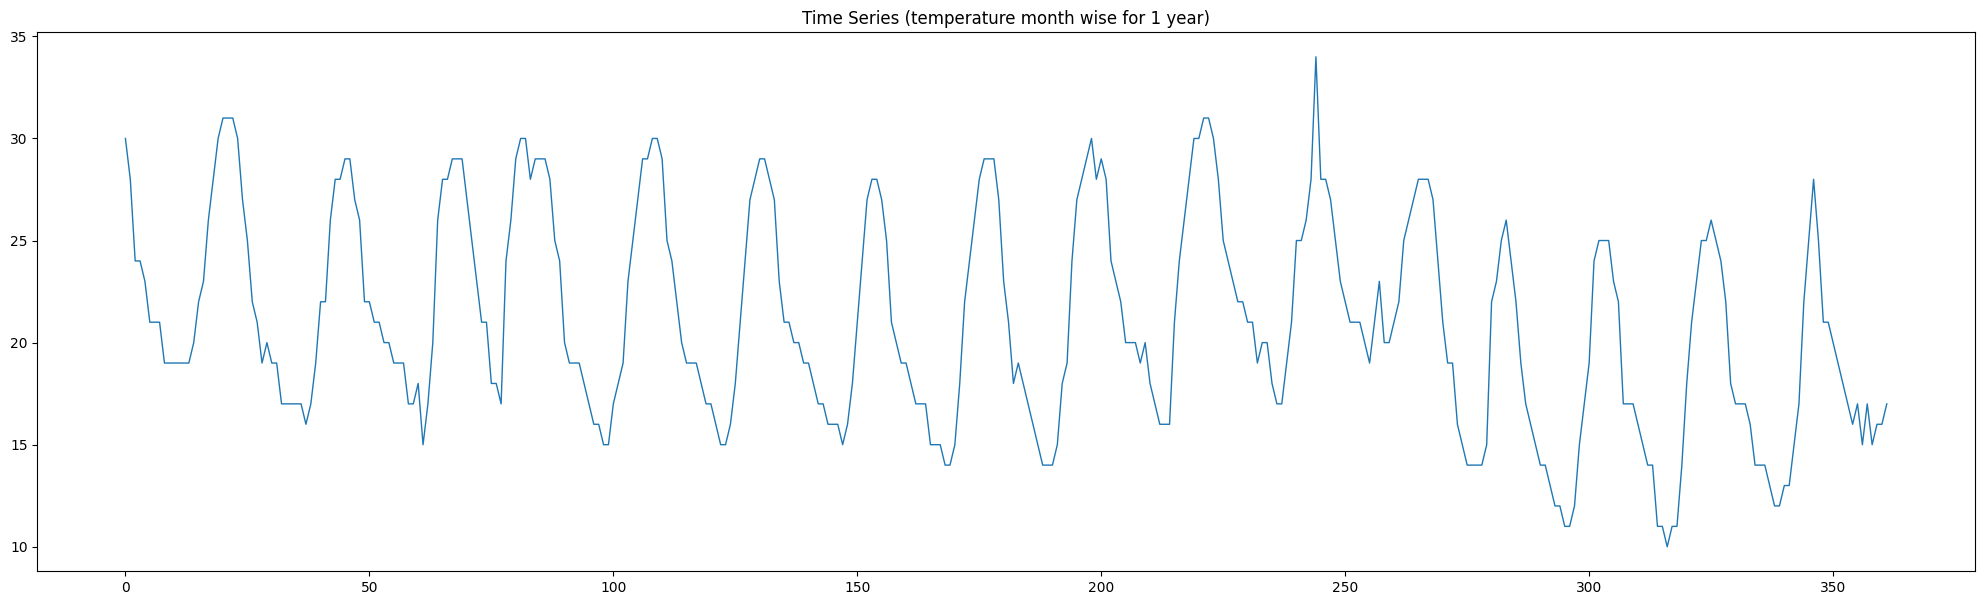

In [9]:
df=df.reshape(-1,1)
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

##### Scaling data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [11]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

In [12]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [13]:
out[:10]

[array([0.875]),
 array([0.875]),
 array([0.875]),
 array([0.83333333]),
 array([0.70833333]),
 array([0.625]),
 array([0.5]),
 array([0.45833333]),
 array([0.375]),
 array([0.41666667])]

In [14]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [15]:
len(df)*0.65

235.3

In [16]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [17]:
inp.shape
x_train.shape
x_test.shape

(105, 20, 1)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

##### Model Building

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1971
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1084
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0668
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0574
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0560
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0466
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0477
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0482
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0481
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0431
Epoch 13/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0445
Epoch 14/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0411
Epoch 15/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0398
Epoch 16/300
8/8 ━━━━━━━━━


### Predictions and Model evaluation

Predictions on training set


In [21]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Value 0.7184025
Expected value 0.7083333333333334


Predictions on testing set

In [22]:
predictions=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [23]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.42291638
Expected Value 0.41666666666666663


In [24]:
predictions.shape

(105, 1)

In [25]:
y_test.shape

(105, 1)

In [26]:
pred_df=pd.DataFrame(predictions)

In [27]:
pred_df['TrueValues']=y_test

In [28]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [29]:
pred_df_new

,Predictions,TrueValues
0,0.448922,0.541667
1,0.556965,0.416667
2,0.422916,0.416667
3,0.428694,0.458333
4,0.505465,0.500000
...,...,...
100,0.211580,0.291667
101,0.262949,0.208333
102,0.235672,0.250000
103,0.283987,0.250000


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

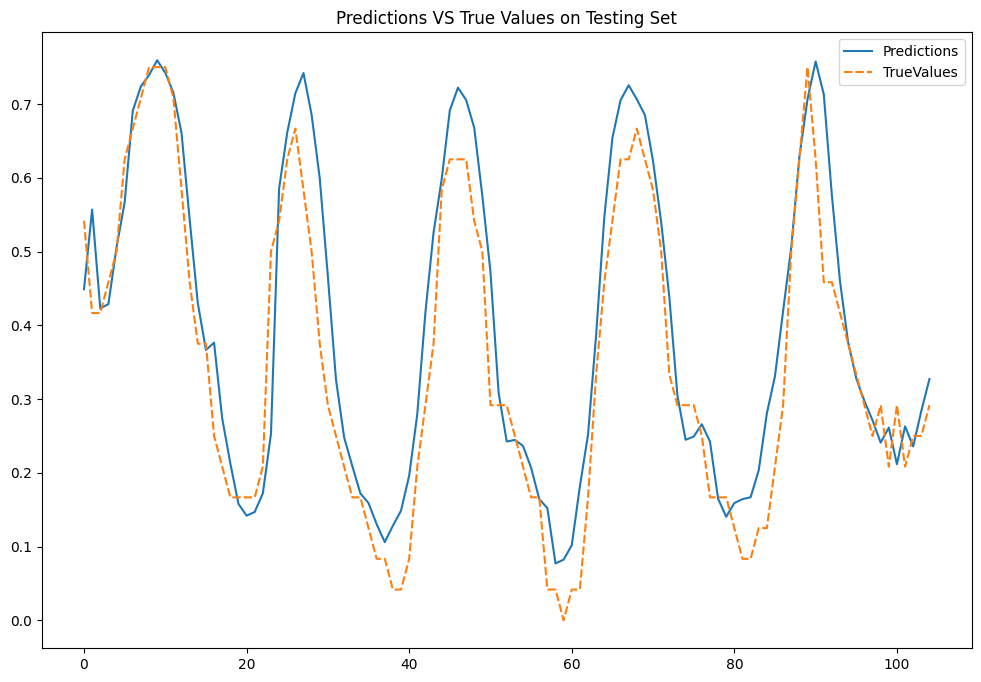

In [30]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")


### Weather Predictions for next 30 Days

we are using last 10 days input for 1st day output


In [31]:
data_scaled.shape

(362, 1)

In [32]:
x_input=data_scaled[:20]

In [33]:
x_input.shape

(20, 1)

In [34]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [35]:
x_input.shape

(1, 20)

In [36]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

creatitng a functions which returns the next 30 days prediction

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.83517724]
1 day input [0.75       0.58333333 0.58333333 0.54166667 0.45833333 0.45833333
 0.45833333 0.375      0.375      0.375      0.375      0.375
 0.375      0.41666667 0.5        0.54166667 0.66666667 0.75
 0.83333333 0.83517724]
1 day output [[0.82545143]]
2 day input [0.58333333 0.58333333 0.54166667 0.45833333 0.45833333 0.45833333
 0.375      0.375      0.375      0.375      0.375      0.375
 0.41666667 0.5        0.54166667 0.66666667 0.75       0.83333333
 0.83517724 0.82545143]
2 day output [[0.7842191]]
3 day input [0.58333333 0.54166667 0.45833333 0.45833333 0.45833333 0.375
 0.375      0.375      0.375      0.375      0.375      0.41666667
 0.5        0.54166667 0.66666667 0.75       0.83333333 0.83517724
 0.82545143 0.78421909]
3 day output [[0.71694046]]
4 day input [0.54166667 0.45833333 0.45833333 0.45833333 0.375      0.375
 0.375      0.375      0.375      0.375      0.41666667 0.5
 0.54166667 0.66666667 0.75       0.83333333 0.83517724 0.82545143
 0.78421909 0

In [38]:
day_new = np.arange(1,363)
day_pred = np.arange(363,393)

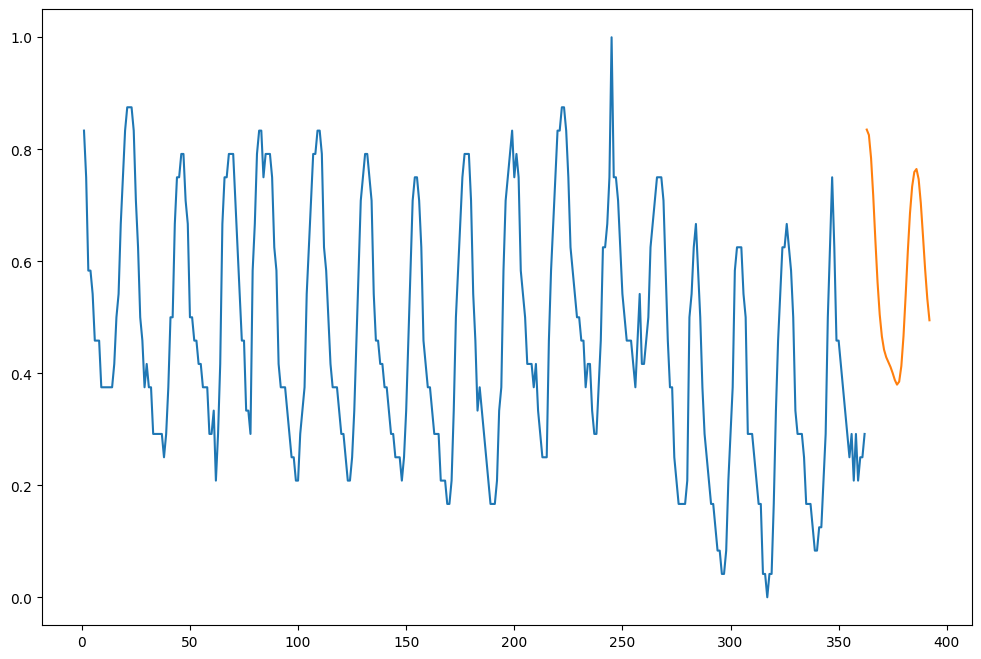

In [39]:
plt.figure(figsize=(12,8))
plt.plot(day_new,data_scaled)
plt.plot(day_pred,lst_output)

In [40]:
data_scaled[:5]

array([[0.83333333],
       [0.75      ],
       [0.58333333],
       [0.58333333],
       [0.54166667]])

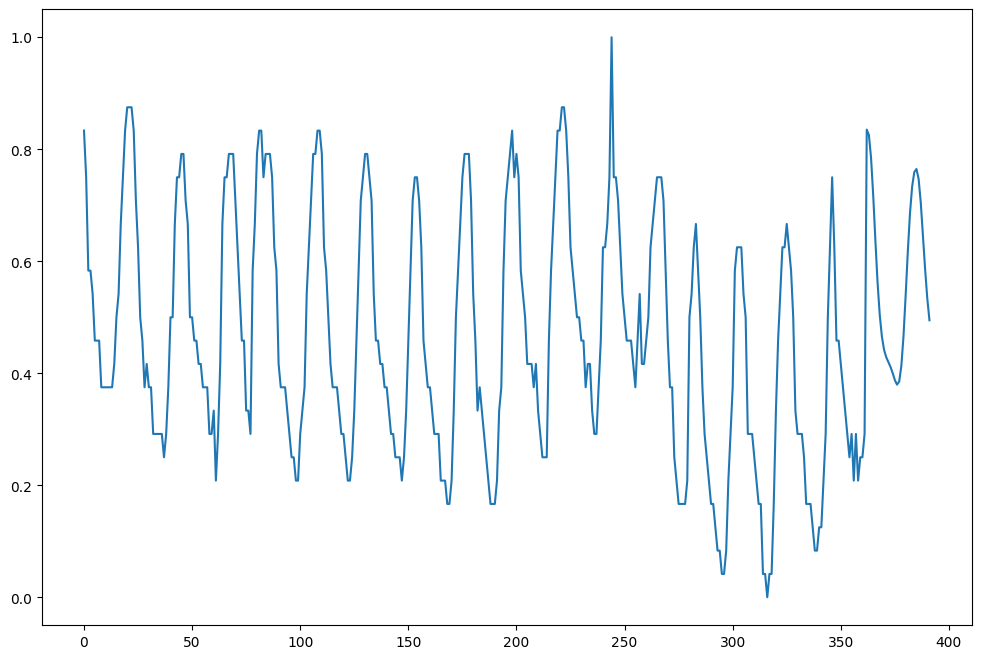

In [41]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)

## Weather Prediction with LSTM

This notebook reads a weather dataset, aggregates it into monthly and yearly values (using average temperature as a sample target) and builds separate LSTM models for forecasting future weather conditions. The trained models are exported to disk.

In [42]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Set random seed for reproducibility
np.random.seed(42)

In [51]:

data_path = './delhiWeatherHistory.csv'
df = pd.read_csv(data_path)

# Convert datetime_utc to datetime object (format: YYYYMMDD-HH:MM)
df['datetime'] = pd.to_datetime(df['datetime_utc'], format='%Y%m%d-%H:%M', errors='coerce')
df = df.dropna(subset=['datetime'])

# Replace -9999 with NaN and convert numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].replace(-9999, np.nan).astype(float)

# Fill missing numeric data (simple forward fill)
df = df.sort_values('datetime').fillna(method='ffill')

In [53]:

# Create monthly and yearly aggregates. Here we use _tempm (temperature) as the target.
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.to_period('M')

# Monthly aggregate: average temperature
monthly = df.groupby('month')[' _tempm'].mean().reset_index()
monthly['month'] = monthly['month'].astype(str)

# Yearly aggregate: average temperature
yearly = df.groupby('year')[' _tempm'].mean().reset_index()

In [54]:

def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

# Settings
window_size = 3

# Prepare monthly data sequences
monthly_values = monthly[' _tempm'].values
X_month, y_month = create_sequences(monthly_values, window_size)
X_month = X_month.reshape((X_month.shape[0], X_month.shape[1], 1))

# Prepare yearly data sequences
yearly_values = yearly[' _tempm'].values
if len(yearly_values) > window_size:
    X_year, y_year = create_sequences(yearly_values, window_size)
    X_year = X_year.reshape((X_year.shape[0], X_year.shape[1], 1))
else:
    X_year, y_year = None, None
    print('Not enough yearly data to create sequences.')

In [56]:

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Build monthly LSTM model
monthly_model = build_lstm_model((window_size, 1))

# Build yearly LSTM model if data is available
if X_year is not None:
    yearly_model = build_lstm_model((window_size, 1))
else:
    yearly_model = None

In [57]:

es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train monthly model
print('Training monthly model...')
monthly_history = monthly_model.fit(X_month, y_month, epochs=50, batch_size=1, verbose=1, callbacks=[es])

# Save monthly model
monthly_model_path = '/Users/taf/Projects/SolarHelper/monthly_lstm_model.h5'
monthly_model.save(monthly_model_path)
print(f'Monthly model saved to {monthly_model_path}')

# Train yearly model if available
if yearly_model is not None:
    print('Training yearly model...')
    yearly_history = yearly_model.fit(X_year, y_year, epochs=50, batch_size=1, verbose=1, callbacks=[es])

    # Save yearly model
    yearly_model_path = '/Users/taf/Projects/SolarHelper/yearly_lstm_model.h5'
    yearly_model.save(yearly_model_path)
    print(f'Yearly model saved to {yearly_model_path}')
else:
    print('Yearly model not trained due to insufficient data.')

Training monthly model...
Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 283.0892
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2303
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0632
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3618
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 4.5634
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 6.0124
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2046 
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0000
Epoch 9/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8193
Epoch 10/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4149
Epoch 11/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2953
Epoch 12/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5185
Epoch 13/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6181
Epoch 14/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6580
Epoch 15/50
242/242 ━

Monthly model saved to /Users/taf/Projects/SolarHelper/monthly_lstm_model.h5
Training yearly model...
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 603.3666   
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 387.6795 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.2446  
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4925 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6296
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5638 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6461 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5378  
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4598 
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1436 
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1771 
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5542 
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8986 
Epoch 14/50
19/19 ━━━━━━━━

Yearly model saved to /Users/taf/Projects/SolarHelper/yearly_lstm_model.h5


In [58]:

# Demonstration: Predict the next monthly temperature
last_sequence = monthly_values[-window_size:]
last_sequence = last_sequence.reshape((1, window_size, 1))
predicted_month = monthly_model.predict(last_sequence)
print('Predicted next monthly average temperature:', predicted_month[0][0])

# If yearly model available, predict next yearly average temperature
if yearly_model is not None:
    last_sequence_year = yearly_values[-window_size:]
    last_sequence_year = last_sequence_year.reshape((1, window_size, 1))
    predicted_year = yearly_model.predict(last_sequence_year)
    print('Predicted next yearly average temperature:', predicted_year[0][0])
else:
    print('Yearly prediction not available.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted next monthly average temperature: 32.87776
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted next yearly average temperature: 25.057873
